# Machine Learning Feature Extraction Optimization Using Evolutionary Computation Algorithms


- Problem Definition

- Dataset Explanation

- Strategies


## Possible dataset

[Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data) (13 features)

[Real or Fake Jobposting Prediction Dataset](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction) (18 features)

[Footballer Price Prediction Dataset](https://www.kaggle.com/datasets/rashadrmammadov/football-teams-price-prediction) (26 features)

[Loan Default Prediction Dataset](https://www.kaggle.com/datasets/hemanthsai7/loandefault) (35 features)

[Bankruptcy Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction) (96 features)


## Models

- Random Forest

- XGBoost

- Logistic Regression

- Linear Regression

- FCNN(?)

- SVM(?)

In [24]:
# !pip install pandas numpy scikit-learn kagglehub

In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

path_bankrupt = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
path_loan = kagglehub.dataset_download("hemanthsai7/loandefault")
path_footballer = kagglehub.dataset_download("rashadrmammadov/football-teams-price-prediction")
path_job = kagglehub.dataset_download("shivamb/real-or-fake-fake-jobposting-prediction")
path_heart = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")


/home/tugberk/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
heart_data_path = f"{path_heart}/heart_failure_clinical_records_dataset.csv"
job_data_path = f"{path_job}/fake_job_postings.csv"
footballer_data_path = f"{path_footballer}/Football_teams_price_data.csv"
loan_data_path = f"{path_loan}/train.csv"
bankrupt_data_path = f"{path_bankrupt}/data.csv"

In [4]:
heart_data = pd.read_csv(heart_data_path)
job_data = pd.read_csv(job_data_path)
footballer_data = pd.read_csv(footballer_data_path)
loan_data = pd.read_csv(loan_data_path)
bankrupt_data = pd.read_csv(bankrupt_data_path)

# Check Datasets
- There is not null values in any dataset.

In [29]:
display(len(heart_data.columns))

13

In [ ]:
# Check data types and missing values for each dataset
display(heart_data.info())
display(job_data.info())
display(footballer_data.info())
display(loan_data.info())
display(bankrupt_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AveragePlayerAge              50000 non-null  float64
 1   TotalGoalsLastSeason          50000 non-null  int64  
 2   MatchesWonLastSeason          50000 non-null  int64  
 3   MatchesDrawnLastSeason        50000 non-null  int64  
 4   MatchesLostLastSeason         50000 non-null  int64  
 5   TotalGoalsConcededLastSeason  50000 non-null  int64  
 6   TotalRevenueLastSeason        50000 non-null  float64
 7   StadiumCapacity               50000 non-null  int64  
 8   AverageAttendance             50000 non-null  float64
 9   TransferSpendingLastSeason    50000 non-null  float64
 10  TransferIncomeLastSeason      50000 non-null  float64
 11  NumberOfTrophies              50000 non-null  int64  
 12  MarketValueOfSquad            50000 non-null  float64
 13  A

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

None

In [31]:
# prompt: write me a code that prints the column names for the datasets above

print("Heart Failure Dataset Columns:")
print(heart_data.columns.tolist())
print("\nFake Job Posting Dataset Columns:")
print(job_data.columns.tolist())
print("\nFootballer Price Dataset Columns:")
print(footballer_data.columns.tolist())
print("\nLoan Default Dataset Columns:")
print(loan_data.columns.tolist())
print("\nBankruptcy Prediction Dataset Columns:")
print(bankrupt_data.columns.tolist())

Heart Failure Dataset Columns:
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Fake Job Posting Dataset Columns:
['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']

Footballer Price Dataset Columns:
['AveragePlayerAge', 'TotalGoalsLastSeason', 'MatchesWonLastSeason', 'MatchesDrawnLastSeason', 'MatchesLostLastSeason', 'TotalGoalsConcededLastSeason', 'TotalRevenueLastSeason', 'StadiumCapacity', 'AverageAttendance', 'TransferSpendingLastSeason', 'TransferIncomeLastSeason', 'NumberOfTrophies', 'MarketValueOfSquad', 'AveragePlayerMarketValue', 'YouthAcademyRating', 'League', 'Country', 'Manager', 'TeamFormation', 'PlayingS

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def fitness(chromosome, model, X, y):
    # Select features based on the chromosome
    selected_features = np.where(chromosome == 1)[0]

    if len(selected_features) == 0:
        # Return a very low fitness score if no features are selected
        return 0.0

    # Subset the dataset using selected features
    X_selected = X[:, selected_features]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    try:
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate and return accuracy
        fitness = accuracy_score(y_test, y_pred)
        return fitness
    except Exception as e:
        print(f"Error during model training or prediction: {e}")
        return 0.0


## Parent Selection Types

In [8]:
def rank_based_selection(fitness_values, num_parents):
    sorted_indices = np.argsort(fitness_values)
    ranks = np.arange(1, len(fitness_values) + 1)
    total_rank = np.sum(ranks)
    probabilities = ranks / total_rank
    selected_parents = np.random.choice(sorted_indices, size=num_parents, p=probabilities)
    return selected_parents

In [9]:
def tournament_selection(fitness_values, num_parents=2, tournament_size=3):
    """
    Perform tournament selection to choose parents for crossover.

    Args:
        fitness_values (numpy.ndarray): Array of fitness values for the population.
        num_parents (int): Number of parents to select.
        tournament_size (int): Number of individuals to compete in each tournament.

    Returns:
        numpy.ndarray: Indices of the selected parents.
    """
    selected_parents = []  # Initialize an empty list to store the indices of selected parents

    for _ in range(num_parents):
        # Randomly select 'tournament_size' individuals from the population
        tournament_indices = np.random.choice(len(fitness_values), size=tournament_size, replace=False)
        
        # Get the fitness values of the selected individuals
        tournament_fitness = fitness_values[tournament_indices]
        
        # Find the index of the individual with the highest fitness in the tournament
        winner_index = tournament_indices[np.argmax(tournament_fitness)]
        
        # Add the index of the winner to the list of selected parents
        selected_parents.append(winner_index)
    
    return np.array(selected_parents)  # Convert the list to a numpy array and return it

In [10]:
def roulette_wheel_selection(fitness_values, num_parents):
    total_fitness = np.sum(fitness_values)
    probabilities = fitness_values / total_fitness
    selected_parents = np.random.choice(len(fitness_values), size=num_parents, p=probabilities)
    return selected_parents

## Crossover and Mutation Functions

In [11]:
def crossover(population, parents, crossover_rate, dimensions): #single-point crossover
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, dimensions)
        child1 = np.concatenate((population[parents[0], :point], population[parents[1], point:]))
        child2 = np.concatenate((population[parents[1], :point], population[parents[0], point:]))
        return child1, child2
    else:
        return population[parents[0]], population[parents[1]]

In [12]:
def bitFlip_mutation(chromosome, mutation_rate): #bit flip mutation
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

## Evolutionary Computation Algorithms

In [23]:
def genetic_algorithm(dataset, model, dimension, population_size, generations, mutation_rate, crossover_rate):
    pop = np.random.randint(0, 2, size=(population_size, dimension))
    X = dataset.iloc[:, 1:].values  # All columns except the last one
    y = dataset.iloc[:, 0].values
    fitness_values = [fitness(chromosome, model, X, y) for chromosome in pop]
    
    # Finding the Best
    max_fitness = np.max(fitness_values)  # Find the maximum fitness value
    best_chromosomes = [chromosome for chromosome, fitness in zip(pop, fitness_values) if fitness == max_fitness]  # Get all chromosomes with max fitness

    # If multiple chromosomes have the same max fitness, choose the one with the fewest 1s
    if len(best_chromosomes) > 1:
        best_chromosome = min(best_chromosomes, key=lambda chromosome: np.sum(chromosome))  # Select chromosome with fewest 1s
    else:
        best_chromosome = best_chromosomes[0]  # If only one, select it directly

    best_fitness = max_fitness  # Assign the max fitness value

    fitness_stats = {
        "mean": [],
        "std": [],
        "best": [],
        "worst": []
    }

    print(f"generation:{0}, best fitness: {best_fitness}, best chromosome: {best_chromosome}")
    for gen in range(1, generations):
        pop_new = np.zeros((len(pop), dimension), dtype=int)
        for i in range(len(pop) // 2):
            parents = roulette_wheel_selection(fitness_values, len(pop))
            child1, child2 = crossover(pop, parents, crossover_rate, dimension)
            pop_new[i*2] = bitFlip_mutation(child1, mutation_rate)
            pop_new[i*2 + 1] = bitFlip_mutation(child2, mutation_rate)
        pop = pop_new
        fitness_values = [fitness(chromosome, model, X, y) for chromosome in pop]

        max_idx = np.argmax(fitness_values)
        max_fitness = np.max(fitness_values)
        if fitness_values[max_idx] > best_fitness:
            best_chromosomes = [chromosome for chromosome, fitness in zip(pop, fitness_values) if fitness == max_fitness]  # Get all chromosomes with max fitness

            # If multiple chromosomes have the same max fitness, choose the one with the fewest 1s
            if len(best_chromosomes) > 1:
                best_chromosome = min(best_chromosomes, key=lambda chromosome: np.sum(chromosome))  # Select chromosome with fewest 1s
            else:
                best_chromosome = best_chromosomes[0]  # If only one, select it directly
            best_fitness = fitness_values[max_idx]

        if gen == generations - 1:
            mean_fitness = np.mean(fitness_values)
            std_fitness = np.std(fitness_values)
            best_fitness_gen = np.max(fitness_values)
            worst_fitness_gen = np.min(fitness_values)

            fitness_stats["mean"].append(mean_fitness)
            fitness_stats["std"].append(std_fitness)
            fitness_stats["best"].append(best_fitness_gen)
            fitness_stats["worst"].append(worst_fitness_gen)

        print(f"generation:{gen}, best fitness: {best_fitness}, best chromosome: {best_chromosome}")
    
    # Get the best and worst chromosomes and their fitness values in the last generation
    worst_chromosome = pop[np.argmin(fitness_values)]
    worst_fitness = np.min(fitness_values)

    return best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness


In [14]:
# Differential Evolution for Binary Representation
def differential_evolution(dataset, model, dimension, population_size, generations, F, crossover_rate):
    """
    Args:
        X: Feature matrix.
        y: Target vector.
        model: Machine learning model to evaluate fitness.
        dimension: Number of features (dimensions).
        population_size: Number of individuals in the population.
        generations: Number of generations.
        F: Differential weight. [0, 2]
        crossover_rate: Crossover probability.
    Returns:
        best_solution: Best chromosome found.
        best_fitness: Fitness of the best chromosome.
    """
    # Initialize population with binary representation
    population = np.random.randint(0, 2, size=(population_size, dimension))

    X = dataset.iloc[:, :-1].values  # All columns except the last one
    y = dataset.iloc[:, -1].values

    fitness_values = np.array([fitness(ind, model, X, y) for ind in population])
    best_idx = np.argmax(fitness_values)
    best_solution = population[best_idx]
    best_fitness = fitness_values[best_idx]

    for gen in range(generations):
        for i in range(population_size):
            # Select three random indices r1, r2, r3 (distinct from each other and i)
            indices = list(range(population_size))
            indices.remove(i)
            r1, r2, r3 = np.random.choice(indices, 3, replace=False)

            # Mutation: Generate mutant vector
            mutant = np.copy(population[r1])
            for d in range(dimension):
                if np.random.rand() < F:
                    mutant[d] = population[r2][d] ^ population[r3][d]  # XOR mutation

            # Crossover: Create trial vector
            trial = np.copy(population[i])
            for d in range(dimension):
                if np.random.rand() < crossover_rate:
                    trial[d] = mutant[d]

            # Calculate fitness of trial vector
            trial_fitness = fitness(trial, model, X, y)

            # Selection: Replace if trial vector is better
            if trial_fitness > fitness_values[i]:
                population[i] = trial
                fitness_values[i] = trial_fitness

                # Update global best
                if trial_fitness > best_fitness:
                    best_solution = trial
                    best_fitness = trial_fitness

        print(f"Generation {gen + 1}: Best Fitness = {best_fitness}: Best Solution = {best_solution}")

    return best_solution, best_fitness

In [15]:
def evolution_strategy(dataset, model, dimension, population_size, generations, mutation_rate):
    """
    Evolution Strategy algorithm for feature selection.

    Args:
        dataset: Pandas DataFrame containing the dataset.
        model: Machine learning model to evaluate fitness.
        dimension: Number of features.
        population_size: Population size.
        generations: Number of generations.
        mutation_rate: Mutation rate.

    Returns:
        tuple: Best chromosome and its fitness.
    """

    # Initialize population with binary representation
    population = np.random.randint(0, 2, size=(population_size, dimension))
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    # Evaluate initial population fitness
    fitness_values = np.array([fitness(ind, model, X, y) for ind in population])

    best_idx = np.argmax(fitness_values)
    best_solution = population[best_idx]
    best_fitness = fitness_values[best_idx]

    for generation in range(generations):
        for i in range(population_size):
            # Create offspring by mutating the parent using bitFlip_mutation
            offspring = bitFlip_mutation(np.copy(population[i]), mutation_rate) 

            # Evaluate fitness of offspring
            offspring_fitness = fitness(offspring, model, X, y)

            # Select the best between parent and offspring
            if offspring_fitness > fitness_values[i]:
                population[i] = offspring
                fitness_values[i] = offspring_fitness
                if offspring_fitness > best_fitness:
                    best_solution = offspring
                    best_fitness = offspring_fitness
        print(f"Generation {generation + 1}: Best Fitness = {best_fitness}: Best Solution = {best_solution}")

    return best_solution, best_fitness

## Run the Program

In [16]:
#Algorithms : GA, DE, ES
#Datasets: heart_data(13 dimension), job_data(18 dimension), footballer_data(26 dimension)
#          loan_data(35 dimension), bankrupt_data(96 dimension)
def evolution(algorithm, dataset, model, pop_size, gens = 10, mut_rate = 0.01, cross_rate = 0.9, F=0.8):

    dimension = len(dataset.columns) - 1  # The label for the row (last column is not a feature!)
    population_size = pop_size
    generations = gens
    mutation_rate = mut_rate
    crossover_rate = cross_rate
    F = F

    if algorithm == "GA":
        best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness = genetic_algorithm(dataset, model, dimension, population_size, generations, mutation_rate, crossover_rate)
        return best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness
    elif algorithm == "DE":
        print("Running Differential Evolution...")
        # def differential_evolution(dataset, model, dimension, population_size, generations, F, crossover_rate):
        differential_evolution(dataset=dataset, model=model, dimension=dimension, population_size=population_size, generations=generations, F=F, crossover_rate=crossover_rate)
    elif algorithm == "ES":
        print("Running Evolution Strategy...")
        evolution_strategy(dataset, model, dimension, population_size, generations, mutation_rate)

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameters
algorithm = "GA"
dataset = heart_data
model = RandomForestClassifier()
pop_size = 50
gens = 3
mut_rate = 0.1
cross_rate = 0.75

# Run the genetic algorithm
best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness = genetic_algorithm(
    dataset=dataset,
    model=model,
    dimension=len(dataset.columns) - 1,
    population_size=pop_size,
    generations=gens,
    mutation_rate=mut_rate,
    crossover_rate=cross_rate
)

# Print the results
print("Best Chromosome:", best_chromosome)
print("Best Fitness:", best_fitness)
print("Mean Fitness:", mean_fitness)
print("Standard Deviation of Fitness:", std_fitness)
print("Worst Chromosome:", worst_chromosome)
print("Worst Fitness:", worst_fitness)

generation:0, best fitness: 0.7833333333333333, best chromosome: [0 0 0 1 0 1 1 0 0 0 1 1]
generation:1, best fitness: 0.8, best chromosome: [1 1 0 1 1 1 0 1 1 0 1 1]
generation:2, best fitness: 0.8, best chromosome: [1 1 0 1 1 1 0 1 1 0 1 1]
Best Chromosome: [1 1 0 1 1 1 0 1 1 0 1 1]
Best Fitness: 0.8
Mean Fitness: 0.6630000000000001
Standard Deviation of Fitness: 0.06593683846429602
Worst Chromosome: [0 1 0 1 0 0 1 0 0 1 0 0]
Worst Fitness: 0.48333333333333334


In [84]:
from sklearn.ensemble import RandomForestClassifier

gen_alg = "GA"
diff_evol_alg = "DE"
evol_str_alg = "ES"

pop_sizes = [50]
mut_rates = [0.1]
cross_rates = [0.6, 0.75, 0.9]
stats = []
count = 1

# Example usage for different mutation rates, crossover rates, and population sizes
print(f"Running Genetic Algorithm on heart data.\nModel=RandomForestClassifier()")
for pop_size in pop_sizes:
    for mut_rate in mut_rates:
        for cross_rate in cross_rates:
            print(f"Run: {count}")
            print(f"Population Size: {pop_size}, Mutation Rate: {mut_rate}, Crossover Rate: {cross_rate}")
            best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness = evolution(
                algorithm=gen_alg,
                dataset=heart_data,
                model=RandomForestClassifier(),
                pop_size=pop_size,
                gens=3,
                mut_rate=mut_rate,
                cross_rate=cross_rate
            )
            print(f"best_fitness: {best_fitness} best_chromosome: {best_chromosome}")
            stats.append((pop_size, mut_rate, cross_rate, best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness))
            count += 1
            # Convert stats to a DataFrame
stats_df = pd.DataFrame(stats, columns=["Population Size", "Mutation Rate", "Crossover Rate", "Best Chromosome", "Best Fitness", "Mean Fitness", "Std Fitness", "Worst Chromosome", "Worst Fitness"])

# Display the DataFrame
display(stats_df)

Running Genetic Algorithm on heart data.
Model=RandomForestClassifier()
Run: 1
Population Size: 50, Mutation Rate: 0.1, Crossover Rate: 0.6
generation:0, best fitness: 0.8, best chromosome: [0 0 0 0 1 0 1 0 1 0 0 1]
generation:1, best fitness: 0.8, best chromosome: [0 0 0 0 1 0 1 0 1 0 0 1]
generation:2, best fitness: 0.8, best chromosome: [0 0 0 0 1 0 1 0 1 0 0 1]
best_fitness: 0.8 best_chromosome: [0 0 0 0 1 0 1 0 1 0 0 1]
Run: 2
Population Size: 50, Mutation Rate: 0.1, Crossover Rate: 0.75
generation:0, best fitness: 0.8166666666666667, best chromosome: [0 0 0 0 1 0 0 0 1 0 0 1]
generation:1, best fitness: 0.8166666666666667, best chromosome: [0 0 0 0 1 0 0 0 1 0 0 1]
generation:2, best fitness: 0.8166666666666667, best chromosome: [0 0 0 0 1 0 0 0 1 0 0 1]
best_fitness: 0.8166666666666667 best_chromosome: [0 0 0 0 1 0 0 0 1 0 0 1]
Run: 3
Population Size: 50, Mutation Rate: 0.1, Crossover Rate: 0.9
generation:0, best fitness: 0.8, best chromosome: [1 0 0 0 1 1 0 1 0 1 0 1]
generatio

,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]",0.800000,0.690333,0.064212,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]",0.533333
1,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]",0.816667,0.691667,0.050028,"[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]",0.566667
2,"[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1]",0.800000,0.663333,0.064377,"[1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]",0.533333


In [28]:
from sklearn.ensemble import RandomForestClassifier

gen_alg = "GA"
diff_evol_alg = "DE"
evol_str_alg = "ES"

pop_sizes = [10, 20, 30]
mut_rates = [0.1, 0.15, 0.2]
cross_rates = [0.6, 0.75, 0.9]

stats = []
count = 1

# Example usage for different mutation rates, crossover rates, and population sizes
print(f"Running Genetic Algorithm on heart data.\nModel=RandomForestClassifier()")
for pop_size in pop_sizes:
    for mut_rate in mut_rates:
        for cross_rate in cross_rates:
            print(f"Run: {count}")
            print(f"Population Size: {pop_size}, Mutation Rate: {mut_rate}, Crossover Rate: {cross_rate}")
            best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness = evolution(
                algorithm=gen_alg,
                dataset=bankrupt_data,
                model=RandomForestClassifier(),
                pop_size=pop_size,
                gens=5,
                mut_rate=mut_rate,
                cross_rate=cross_rate
            )
            print(f"best_fitness: {best_fitness} best_chromosome: {best_chromosome}")
            stats.append((best_chromosome, best_fitness, mean_fitness, std_fitness, worst_chromosome, worst_fitness))
            count += 1
            # Convert stats to a DataFrame
stats_df = pd.DataFrame(stats, columns=["Best Chromosome", "Best Fitness", "Mean Fitness", "Std Fitness", "Worst Chromosome", "Worst Fitness"])

# Display the DataFrame
display(stats_df)

Running Genetic Algorithm on heart data.
Model=RandomForestClassifier()
Run: 1
Population Size: 10, Mutation Rate: 0.1, Crossover Rate: 0.6
generation:0, best fitness: 0.9706744868035191, best chromosome: [1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0]
generation:1, best fitness: 0.9706744868035191, best chromosome: [1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0]
generation:2, best fitness: 0.9706744868035191, best chromosome: [1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0]
generation:3, best fitness: 0.9706744868035191, best chromosome: [1 1 1 1 0 0 0 1 0

,Best Chromosome,Best Fitness,Mean Fitness,Std Fitness,Worst Chromosome,Worst Fitness
0,"[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, ...",0.970674,0.966496,0.001540,"[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.964076
1,"[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, ...",0.969941,0.966789,0.000737,"[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, ...",0.965543
2,"[1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, ...",0.969208,0.967082,0.001246,"[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, ...",0.964076
3,"[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.969941,0.967229,0.001272,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, ...",0.965543
4,"[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, ...",0.969208,0.965909,0.001680,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, ...",0.963343
5,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, ...",0.970674,0.967595,0.001600,"[1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...",0.964809
6,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.969941,0.966862,0.001218,"[1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.964809
7,"[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, ...",0.970674,0.966862,0.001303,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",0.964809
8,"[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, ...",0.969208,0.966789,0.001272,"[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.964809
9,"[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, ...",0.970674,0.966935,0.001427,"[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...",0.964076


In [29]:
stats_df.to_csv('randomForest10-20-30-6k.csv', index=False) # Set index=False to avoid saving row indices.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_performance(combinations, mean_performances):
    """
    Plots the mean performance of each combination.

    Parameters:
        combinations (list): List of combination labels (e.g., ['1-1-1', '1-1-2', ...]).
        mean_performances (list): List of mean performance values corresponding to each combination.
    """
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(combinations, mean_performances, color='skyblue')

    # Add labels and title
    plt.xlabel('Combinations', fontsize=12)
    plt.ylabel('Mean Performance', fontsize=12)
    plt.title('Mean Performance of Each Combination', fontsize=14)
    plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for better visibility
    plt.ylim(0.96, 0.97)  # Set y-axis range from 0.90 to 1.0

    # Show the plot
    plt.tight_layout()
    plt.show()

pop_sizes = [10, 20, 30]
mut_rates = [0.1, 0.15, 0.2]
cross_rates = [0.6, 0.75, 0.9]

combinations = [f'{i}-{j}-{k}' for i in pop_sizes for j in mut_rates for k in cross_rates]
#mean_performances = stats_df["Mean Fitness"]  # Replace with actual mean performance values

# Plot mean performance
plot_mean_performance(combinations, mean_performances)

NameError: name 'stats_df' is not defined

0     0.959000
1     0.954250
2     0.957750
3     0.958500
4     0.958500
5     0.955750
6     0.955750
7     0.957250
8     0.956500
9     0.955250
10    0.956500
11    0.956500
12    0.957500
13    0.956625
14    0.956375
15    0.956375
16    0.956125
17    0.955625
18    0.956000
19    0.955917
20    0.956917
21    0.955833
22    0.956583
23    0.956417
24    0.956583
25    0.956500
26    0.955667
Name: Mean Fitness, dtype: float64


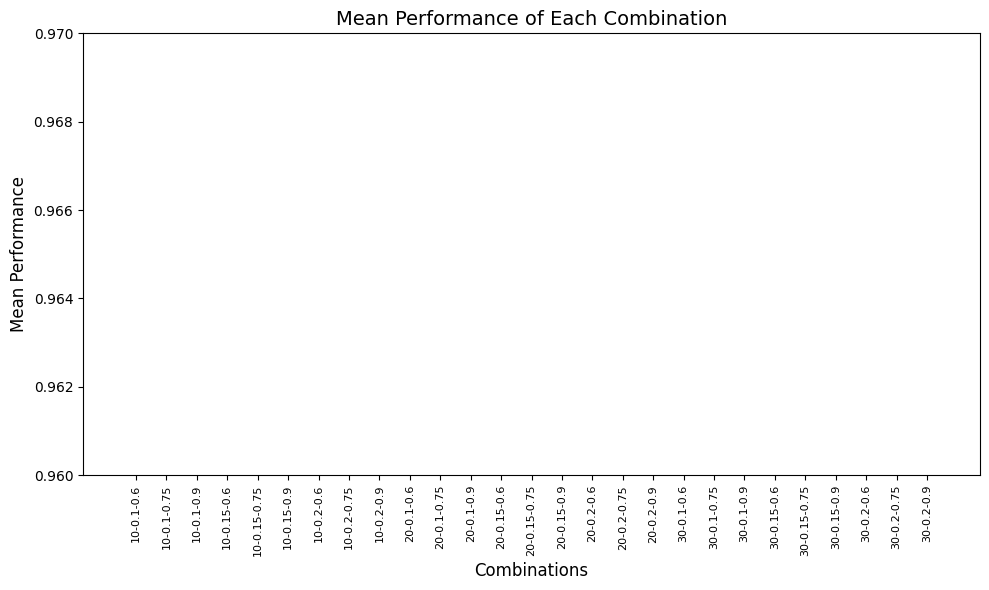

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

randFor10_20_30_2k = pd.read_csv('randomForest10-20-30-2k.csv')
randFor50_2k = pd.read_csv('randomForest50-2k.csv')
xgboost10_20_30_2k = pd.read_csv('XGBoost10-20-30-2k.csv')
xgboost50_2k = pd.read_csv('XGBoost50-2k.csv')
randFor10_20_30_6k = pd.read_csv('randomForest10-20-30-6k.csv')


def plot_mean_performance(combinations, mean_performances):
    """
    Plots the mean performance of each combination.

    Parameters:
        combinations (list): List of combination labels (e.g., ['1-1-1', '1-1-2', ...]).
        mean_performances (list): List of mean performance values corresponding to each combination.
    """
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(combinations, mean_performances, color='skyblue')

    # Add labels and title
    plt.xlabel('Combinations', fontsize=12)
    plt.ylabel('Mean Performance', fontsize=12)
    plt.title('Mean Performance of Each Combination', fontsize=14)
    plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for better visibility
    plt.ylim(0.96, 0.97)  # Set y-axis range from 0.90 to 1.0

    # Show the plot
    plt.tight_layout()
    plt.show()

pop_sizes = [10, 20, 30]
mut_rates = [0.1, 0.15, 0.2]
cross_rates = [0.6, 0.75, 0.9]

combinations = [f'{i}-{j}-{k}' for i in pop_sizes for j in mut_rates for k in cross_rates]

# Plot mean performance
plot_mean_performance(combinations, randFor10_20_30_2k["Mean Fitness"])


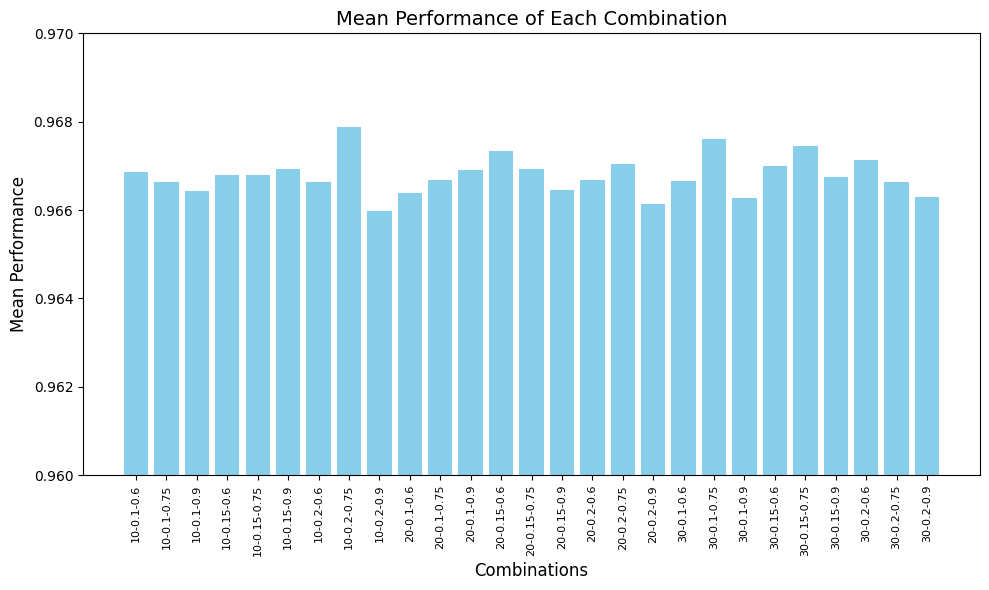

In [8]:
pop_sizes = [10, 20, 30]
mut_rates = [0.1, 0.15, 0.2]
cross_rates = [0.6, 0.75, 0.9]

combinations = [f'{i}-{j}-{k}' for i in pop_sizes for j in mut_rates for k in cross_rates]
plot_mean_performance(combinations, xgboost10_20_30_2k["Mean Fitness"])

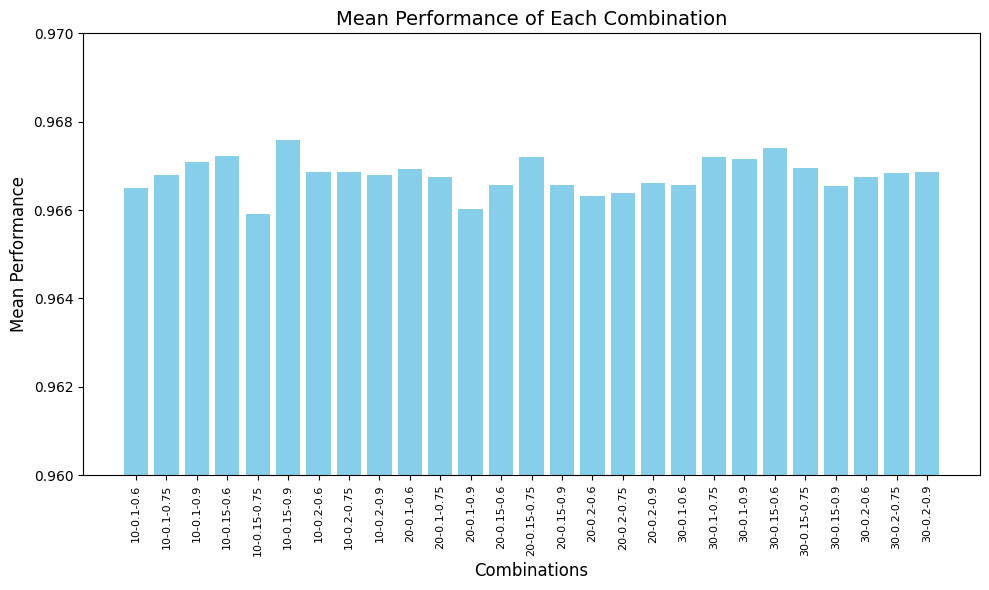

In [9]:
pop_sizes = [10, 20, 30]
mut_rates = [0.1, 0.15, 0.2]
cross_rates = [0.6, 0.75, 0.9]

combinations = [f'{i}-{j}-{k}' for i in pop_sizes for j in mut_rates for k in cross_rates]
plot_mean_performance(combinations, randFor10_20_30_6k["Mean Fitness"])

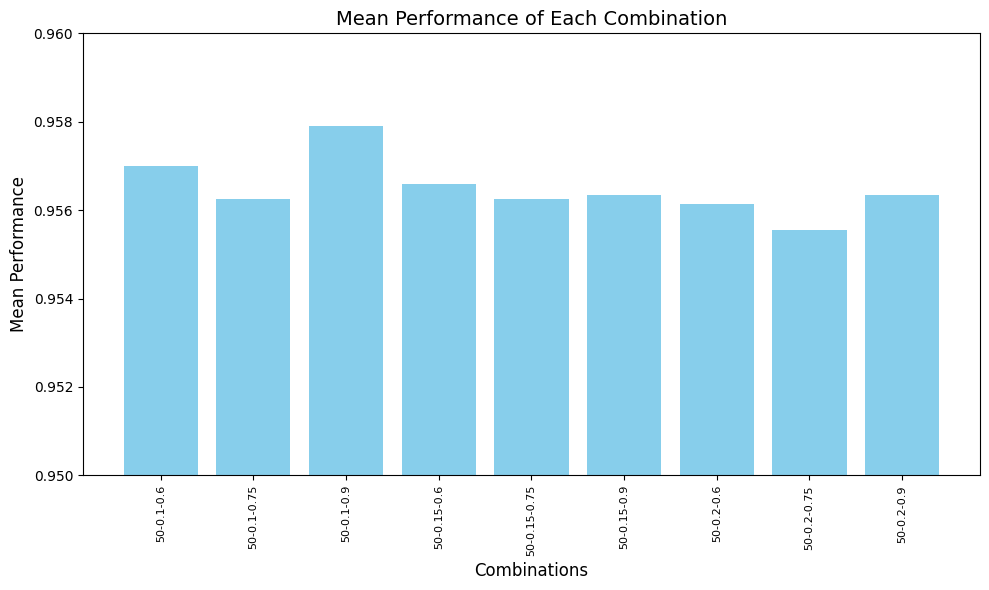

In [16]:
pop_sizes = [50]
mut_rates = [0.1, 0.15, 0.2]
cross_rates = [0.6, 0.75, 0.9]

combinations = [f'{i}-{j}-{k}' for i in pop_sizes for j in mut_rates for k in cross_rates]
plot_mean_performance(combinations, randFor50_2k["Mean Fitness"])

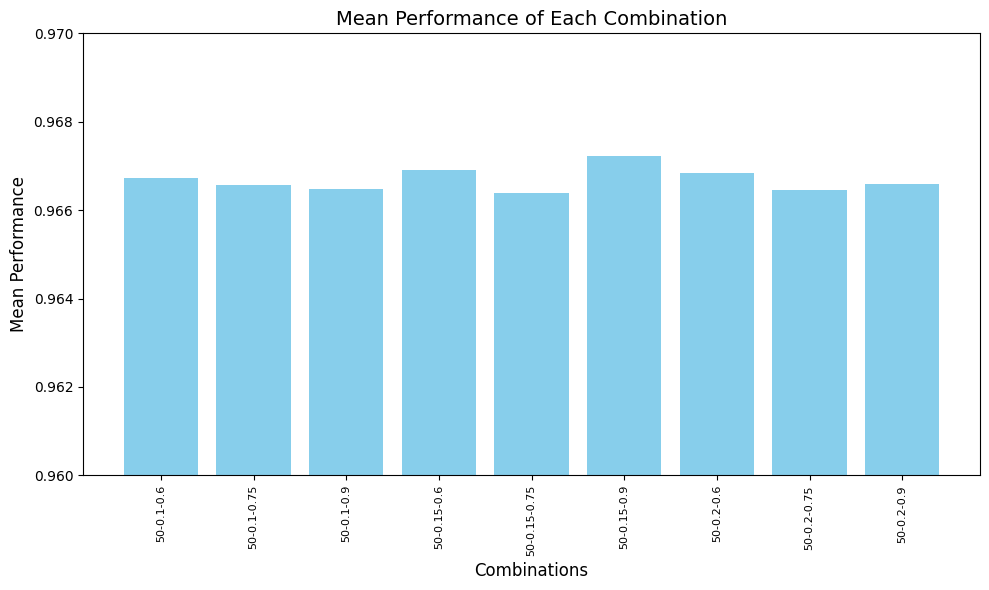

In [21]:
pop_sizes = [50]
mut_rates = [0.1, 0.15, 0.2]
cross_rates = [0.6, 0.75, 0.9]

combinations = [f'{i}-{j}-{k}' for i in pop_sizes for j in mut_rates for k in cross_rates]
plot_mean_performance(combinations, xgboost50_2k["Mean Fitness"])

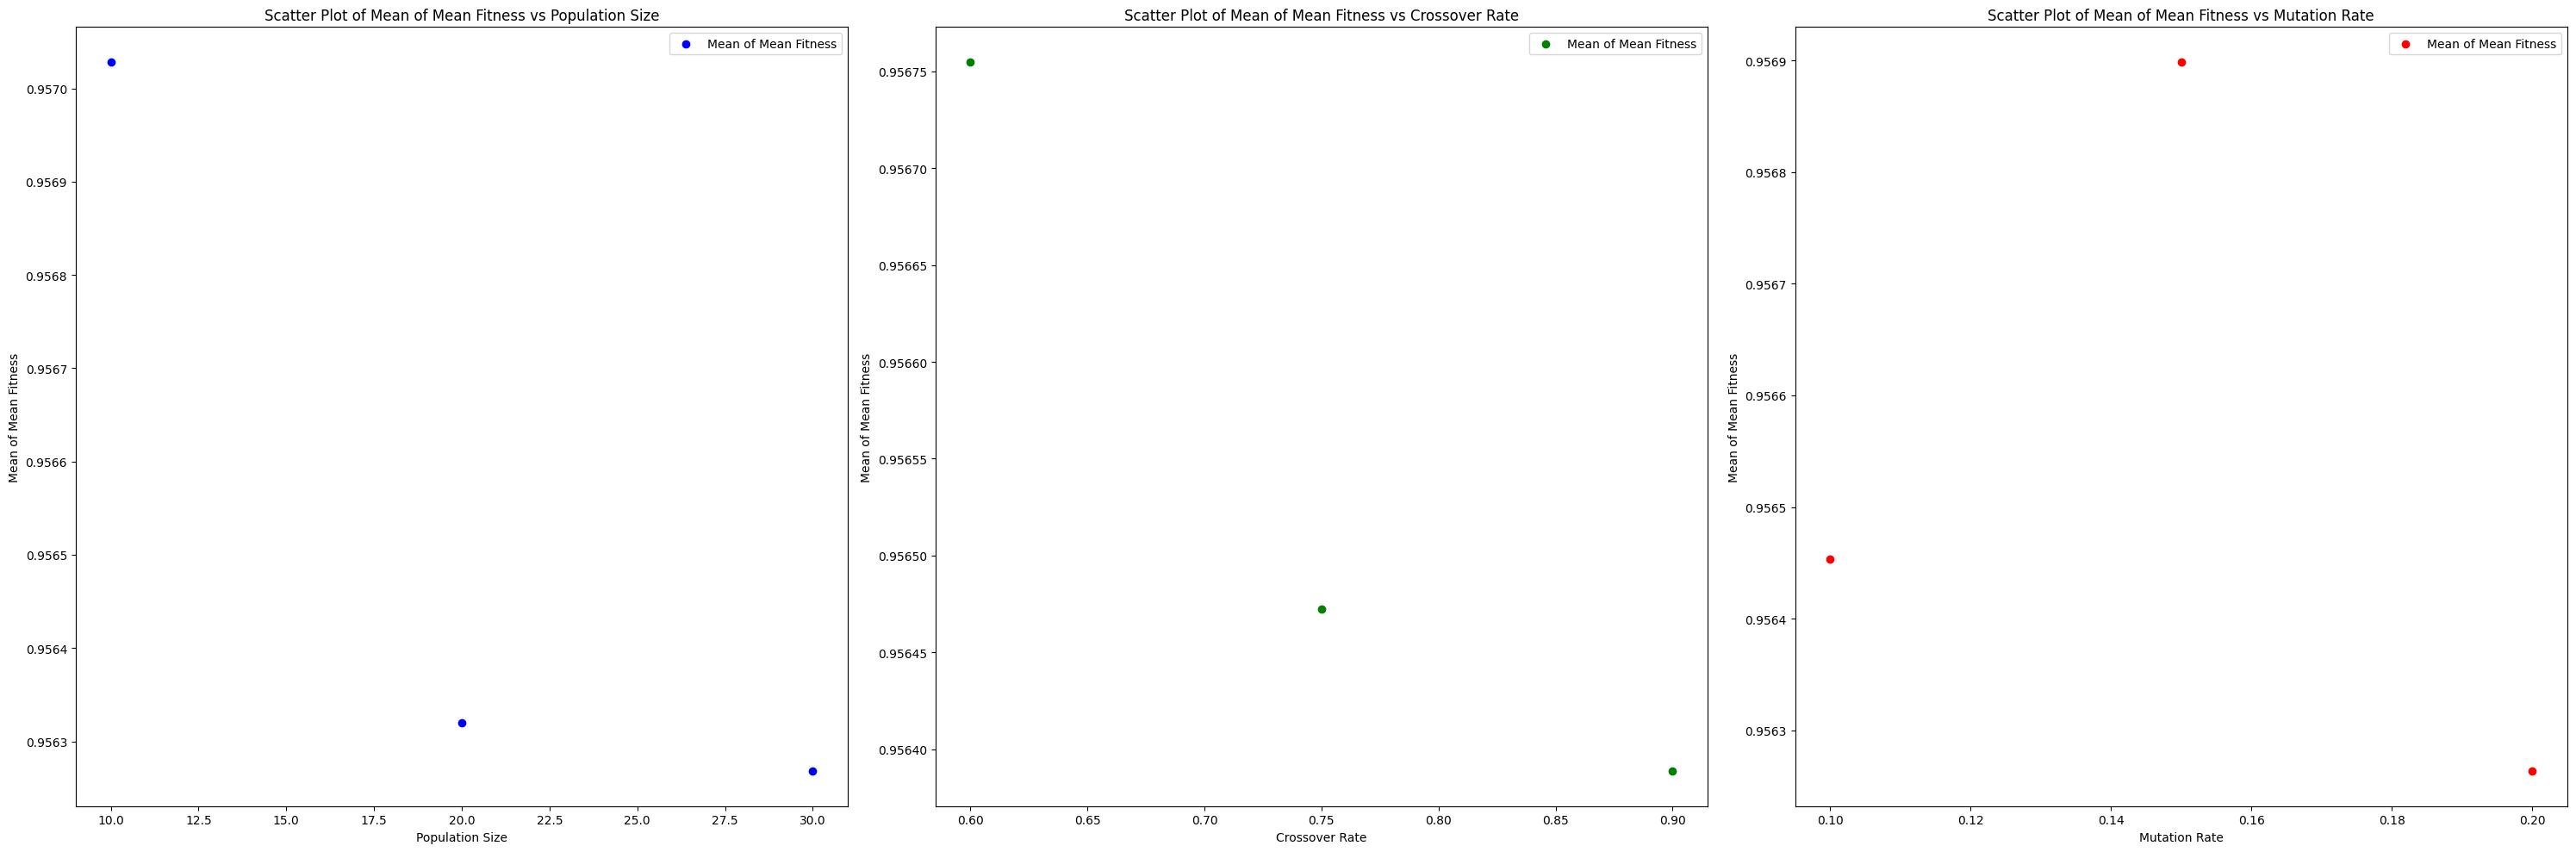

In [23]:
import matplotlib.pyplot as plt

data = randFor10_20_30_2k

# Group the data by population size, crossover rate, and mutation rate and calculate the mean of the "Mean Fitness" column for each group
mean_fitness_by_pop_size = data.groupby('Population Size')['Mean Fitness'].mean()
mean_fitness_by_cross_rate = data.groupby('Crossover Rate')['Mean Fitness'].mean()
mean_fitness_by_mut_rate = data.groupby('Mutation Rate')['Mean Fitness'].mean()

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Plot for Population Size
axs[0].scatter(mean_fitness_by_pop_size.index, mean_fitness_by_pop_size.values, c='blue', label='Mean of Mean Fitness')
axs[0].set_xlabel('Population Size')
axs[0].set_ylabel('Mean of Mean Fitness')
axs[0].set_title('Scatter Plot of Mean of Mean Fitness vs Population Size')
axs[0].legend()

# Plot for Crossover Rate
axs[1].scatter(mean_fitness_by_cross_rate.index, mean_fitness_by_cross_rate.values, c='green', label='Mean of Mean Fitness')
axs[1].set_xlabel('Crossover Rate')
axs[1].set_ylabel('Mean of Mean Fitness')
axs[1].set_title('Scatter Plot of Mean of Mean Fitness vs Crossover Rate')
axs[1].legend()

# Plot for Mutation Rate
axs[2].scatter(mean_fitness_by_mut_rate.index, mean_fitness_by_mut_rate.values, c='red', label='Mean of Mean Fitness')
axs[2].set_xlabel('Mutation Rate')
axs[2].set_ylabel('Mean of Mean Fitness')
axs[2].set_title('Scatter Plot of Mean of Mean Fitness vs Mutation Rate')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()